In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Final 2.csv')
df.head(10)

,S.No.,"""Time_ms""",AIN_FTM201_PV,AIN_LT01A-%_PV,AIN_LT201-%_PV,AIN_LT301-%_PV,AIN_LT401-%_PV,AIN_PT101_PV,AIN_PT102_PV,AIN_PT201_PV,AIN_PT202_PV,AIN_TT01-A1_PV,AIN_TT02_PV,AIN_TT101_PV,AIN_TT201_PV,MSG_ZS_Warn_01_16,MSG_SVC_Alrm_81_96
0,1,44843924400,0.0,0.0393,0.755485,1.294017,0.608534,0.011635,0.027600,0.123924,0.481143,23.950130,22.360058,22.481747,22.724154,0,0
1,3,44843924458,0.0,0.0393,0.756606,1.293281,0.608522,0.009960,0.028700,0.123844,0.481351,23.951006,22.360058,22.507984,22.723972,0,0
2,5,44843924516,0.0,0.0393,0.758616,1.291147,0.608532,0.010300,0.027815,0.123959,0.480798,23.950705,22.360058,22.528824,22.725214,0,0
3,6,44843924574,0.0,0.0393,0.757443,1.293479,0.608453,0.011200,0.028306,0.124720,0.480772,23.950115,22.360058,22.541317,22.722551,0,0
4,8,44843924632,0.0,0.0393,0.758061,1.292186,0.608491,0.010332,0.028400,0.124437,0.480754,23.950062,22.360058,22.535053,22.721098,0,0
5,10,44843924690,0.0,0.0393,0.756275,1.290284,0.608433,0.011100,0.028300,0.124727,0.481020,23.950062,22.360058,22.516506,22.724552,0,0
6,11,44843924748,0.0,0.0393,0.756995,1.291952,0.608456,0.012100,0.027996,0.124572,0.480839,23.950062,22.360058,22.513582,22.725000,0,0
7,13,44843924805,0.0,0.0393,0.755564,1.293725,0.608425,0.010100,0.028300,0.124431,0.481062,23.950062,22.359859,22.524616,22.725792,0,0
8,15,44843924863,0.0,0.0393,0.759540,1.293058,0.608491,0.012200,0.028400,0.124768,0.480903,23.950062,22.359182,22.539032,22.724802,0,0
9,16,44843924921,0.0,0.0393,0.759599,1.292662,0.608445,0.008660,0.027900,0.124690,0.480955,23.950062,22.359409,22.562609,22.722775,0,0


In [3]:
df['AIN_TT02_PV'][:100]

0     22.360058
1     22.360058
2     22.360058
3     22.360058
4     22.360058
        ...    
95    22.340069
96    22.340069
97    22.339855
98    22.340000
99    22.340000
Name: AIN_TT02_PV, Length: 100, dtype: float64

In [4]:
df1 = df.drop(['"Time_ms"', 'S.No.'], axis=1)
df1.head()

,AIN_FTM201_PV,AIN_LT01A-%_PV,AIN_LT201-%_PV,AIN_LT301-%_PV,AIN_LT401-%_PV,AIN_PT101_PV,AIN_PT102_PV,AIN_PT201_PV,AIN_PT202_PV,AIN_TT01-A1_PV,AIN_TT02_PV,AIN_TT101_PV,AIN_TT201_PV,MSG_ZS_Warn_01_16,MSG_SVC_Alrm_81_96
0,0.0,0.0393,0.755485,1.294017,0.608534,0.011635,0.027600,0.123924,0.481143,23.950130,22.360058,22.481747,22.724154,0,0
1,0.0,0.0393,0.756606,1.293281,0.608522,0.009960,0.028700,0.123844,0.481351,23.951006,22.360058,22.507984,22.723972,0,0
2,0.0,0.0393,0.758616,1.291147,0.608532,0.010300,0.027815,0.123959,0.480798,23.950705,22.360058,22.528824,22.725214,0,0
3,0.0,0.0393,0.757443,1.293479,0.608453,0.011200,0.028306,0.124720,0.480772,23.950115,22.360058,22.541317,22.722551,0,0
4,0.0,0.0393,0.758061,1.292186,0.608491,0.010332,0.028400,0.124437,0.480754,23.950062,22.360058,22.535053,22.721098,0,0


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

### Creating a classification model

In [6]:
df1['MSG_ZS_Warn_01_16'].value_counts()

0        33794
32768      755
1          664
1024       604
33792       27
1025        13
256          3
16384        1
Name: MSG_ZS_Warn_01_16, dtype: int64

In [7]:
# The classes are highly imbalanced. Hence the model performance will definitely be lacking.

y = df1['MSG_ZS_Warn_01_16']
X = df1.drop(['MSG_ZS_Warn_01_16','MSG_SVC_Alrm_81_96'], axis=1)

In [8]:
X.head()

,AIN_FTM201_PV,AIN_LT01A-%_PV,AIN_LT201-%_PV,AIN_LT301-%_PV,AIN_LT401-%_PV,AIN_PT101_PV,AIN_PT102_PV,AIN_PT201_PV,AIN_PT202_PV,AIN_TT01-A1_PV,AIN_TT02_PV,AIN_TT101_PV,AIN_TT201_PV
0,0.0,0.0393,0.755485,1.294017,0.608534,0.011635,0.027600,0.123924,0.481143,23.950130,22.360058,22.481747,22.724154
1,0.0,0.0393,0.756606,1.293281,0.608522,0.009960,0.028700,0.123844,0.481351,23.951006,22.360058,22.507984,22.723972
2,0.0,0.0393,0.758616,1.291147,0.608532,0.010300,0.027815,0.123959,0.480798,23.950705,22.360058,22.528824,22.725214
3,0.0,0.0393,0.757443,1.293479,0.608453,0.011200,0.028306,0.124720,0.480772,23.950115,22.360058,22.541317,22.722551
4,0.0,0.0393,0.758061,1.292186,0.608491,0.010332,0.028400,0.124437,0.480754,23.950062,22.360058,22.535053,22.721098


In [9]:
# Preprocessing
cls_scaler = StandardScaler()
data = cls_scaler.fit_transform(X)

In [10]:
data

array([[-0.52426404, -1.59458377, -1.62091408, ..., -1.71356002,
        -1.86996198, -1.77912376],
       [-0.52426404, -1.59458377, -1.62087502, ..., -1.71356002,
        -1.84999909, -1.77913108],
       [-0.52426404, -1.59458377, -1.62080498, ..., -1.71356002,
        -1.83414313, -1.77908089],
       ...,
       [ 0.03828275,  0.44523217,  0.33050714, ...,  0.56730967,
         0.04337991,  1.10806502],
       [ 0.01289954,  0.44523217,  0.32506513, ...,  0.5664152 ,
         0.05263284,  1.11467343],
       [ 0.0286774 ,  0.44523217,  0.31478113, ...,  0.56551127,
         0.05787027,  1.11788404]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier

cls_rf = RandomForestClassifier()
cls_rf.fit(X_train, y_train)
pred = cls_rf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6770
           1       0.86      0.83      0.85       139
        1024       0.86      0.88      0.87       115
        1025       0.75      1.00      0.86         3
       32768       0.83      0.80      0.82       142
       33792       0.44      1.00      0.62         4

    accuracy                           0.98      7173
   macro avg       0.79      0.92      0.83      7173
weighted avg       0.98      0.98      0.98      7173



In [13]:
# Trying Augmentation

from imblearn.over_sampling import RandomOverSampler

over = RandomOverSampler() 
X_over,y_over = over.fit_resample(data,y)

In [14]:
# Splitting the dataset into train and test set.

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [15]:
# Creating a classification model

cls_rf = RandomForestClassifier()
cls_rf.fit(X_train, y_train)
pred = cls_rf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6739
           1       1.00      1.00      1.00      6814
         256       1.00      1.00      1.00      6652
        1024       1.00      1.00      1.00      6712
        1025       1.00      1.00      1.00      6751
       16384       1.00      1.00      1.00      6784
       32768       1.00      1.00      1.00      6826
       33792       1.00      1.00      1.00      6793

    accuracy                           1.00     54071
   macro avg       1.00      1.00      1.00     54071
weighted avg       1.00      1.00      1.00     54071



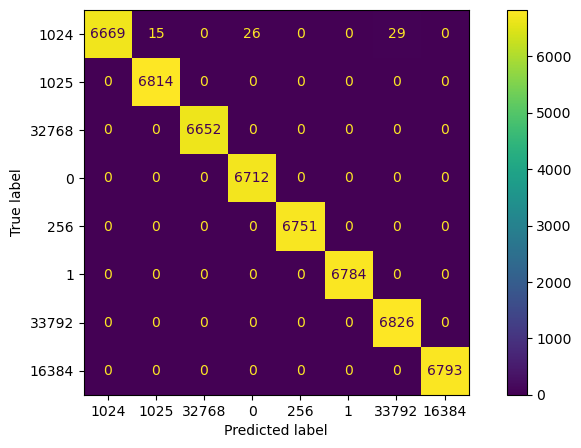

In [16]:
# confusion matrix plot

fig, ax = plt.subplots(figsize=(10, 5))
cm = confusion_matrix(y_test, pred)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_test.unique())
cmp.plot(ax=ax)
plt.show();

### Classifying the predicted values

In [18]:
# importing the data

pred_df = pd.read_csv("prediction_df.csv")
pred_df

,AIN_FTM201_PV,AIN_LT01A-%_PV,AIN_LT201-%_PV,AIN_LT301-%_PV,AIN_LT401-%_PV,AIN_PT101_PV,AIN_PT102_PV,AIN_PT201_PV,AIN_PT202_PV,AIN_TT01-A1_PV,AIN_TT02_PV,AIN_TT101_PV,AIN_TT201_PV
0,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
1,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
2,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
3,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
4,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
3596,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
3597,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
3598,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118


In [19]:
# Using the cls scaler to scale the data

scaled_data = cls_scaler.transform(pred_df)
scaled_data

array([[-0.52426404, -1.4871149 ,  0.75987242, ..., 54.91245511,
        54.36165343, 66.87137703],
       [-0.52426404, -1.4871149 ,  0.75987242, ..., 54.91245511,
        54.36165343, 66.87137703],
       [-0.52426404, -1.4871149 ,  0.75987242, ..., 54.91245511,
        54.36165343, 66.87137703],
       ...,
       [-0.52426404, -1.4871149 ,  0.75987242, ..., 54.91245511,
        54.36165343, 66.87137703],
       [-0.52426404, -1.4871149 ,  0.75987242, ..., 54.91245511,
        54.36165343, 66.87137703],
       [-0.52426404, -1.4871149 ,  0.75987242, ..., 54.91245511,
        54.36165343, 66.87137703]])

In [20]:
# Now classifying with the classification model
pred = cls_rf.predict(scaled_data)

In [23]:
pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
# Adding the predicted class to the dataset

pred_df['category'] = pred

In [25]:
pred_df

,AIN_FTM201_PV,AIN_LT01A-%_PV,AIN_LT201-%_PV,AIN_LT301-%_PV,AIN_LT401-%_PV,AIN_PT101_PV,AIN_PT102_PV,AIN_PT201_PV,AIN_PT202_PV,AIN_TT01-A1_PV,AIN_TT02_PV,AIN_TT101_PV,AIN_TT201_PV,category
0,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118,0
1,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118,0
2,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118,0
3,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118,0
4,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118,0
3596,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118,0
3597,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118,0
3598,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118,0


In [26]:
pred_df['category'].unique()

array([0])